**Context**

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

**Content**

ID -- Unique ID

Gender -- Gender of the customer

Ever_Married -- Marital status of the customer

Age-- Age of the customer

Graduated -- Is the customer a graduate?

Profession -- Profession of the customer

Work_Experience -- Work Experience in years

Spending_Score -- Spending score of the customer

Family_Size -- Number of family members for the customer (including the customer)

Var_1 -- Anonymised Category for the customer

Segmentation -- (target) Customer Segment of the customer

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("/kaggle/input/customer-segmentation/Train.csv")
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


**Checking for missing values**

In [3]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

**Imputing missing value with respective column mode**

In [4]:
for col in data.columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [5]:
data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

The missing value imputation is done. 

In [6]:
data = data.drop("ID", axis = 1)
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


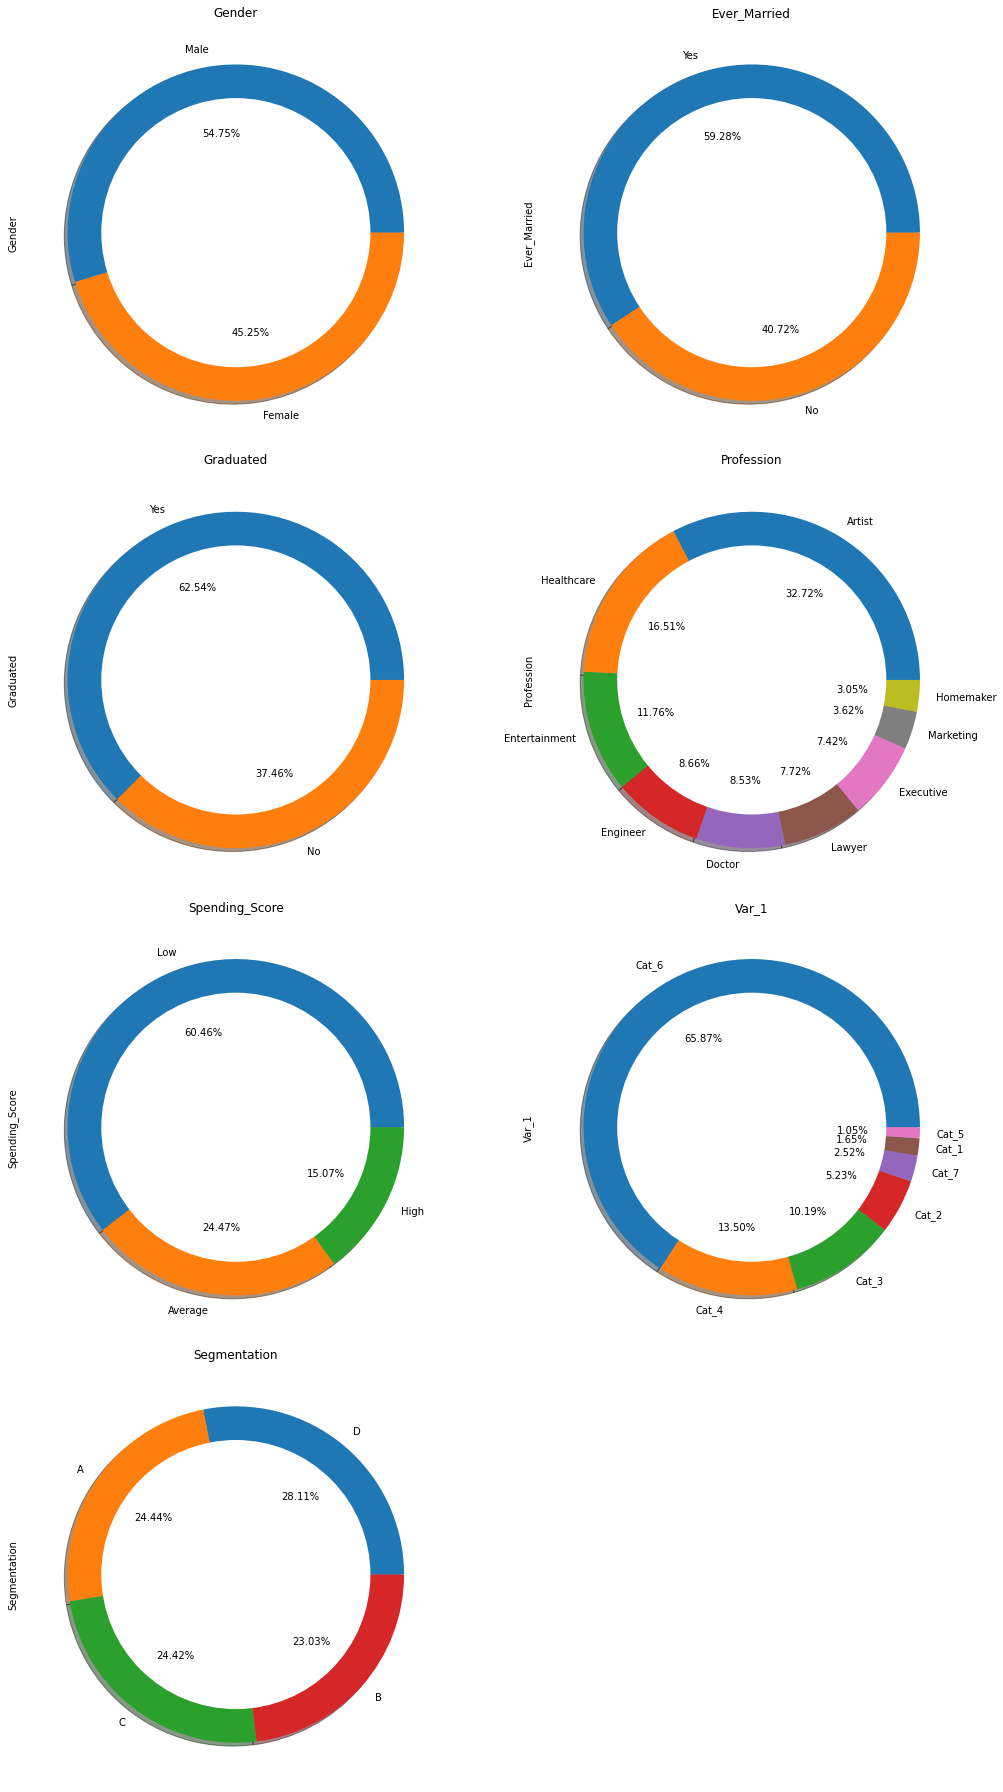

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15,25))

for i, var in enumerate(cat_vars):
    plt.subplot(4, 2, i+1)
    data[var].value_counts().plot(kind='pie',autopct='%.2f%%',shadow = True)
    centre_circle = plt.Circle((0,0),0.80,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(var)


plt.tight_layout()
plt.show()

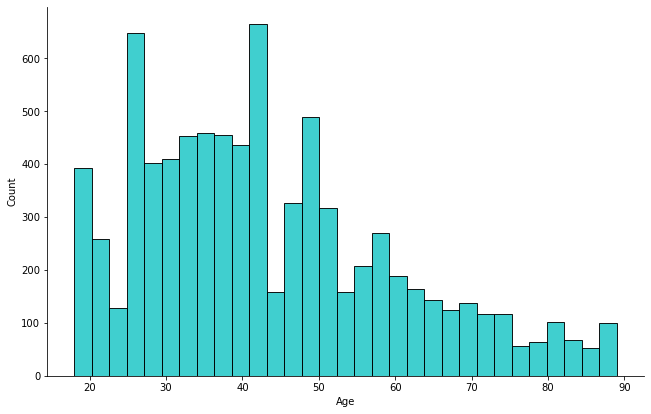

In [8]:
g = sns.displot(data["Age"], color = "c")
g.fig.set_size_inches(10, 6)

<AxesSubplot:xlabel='Family_Size', ylabel='Count'>

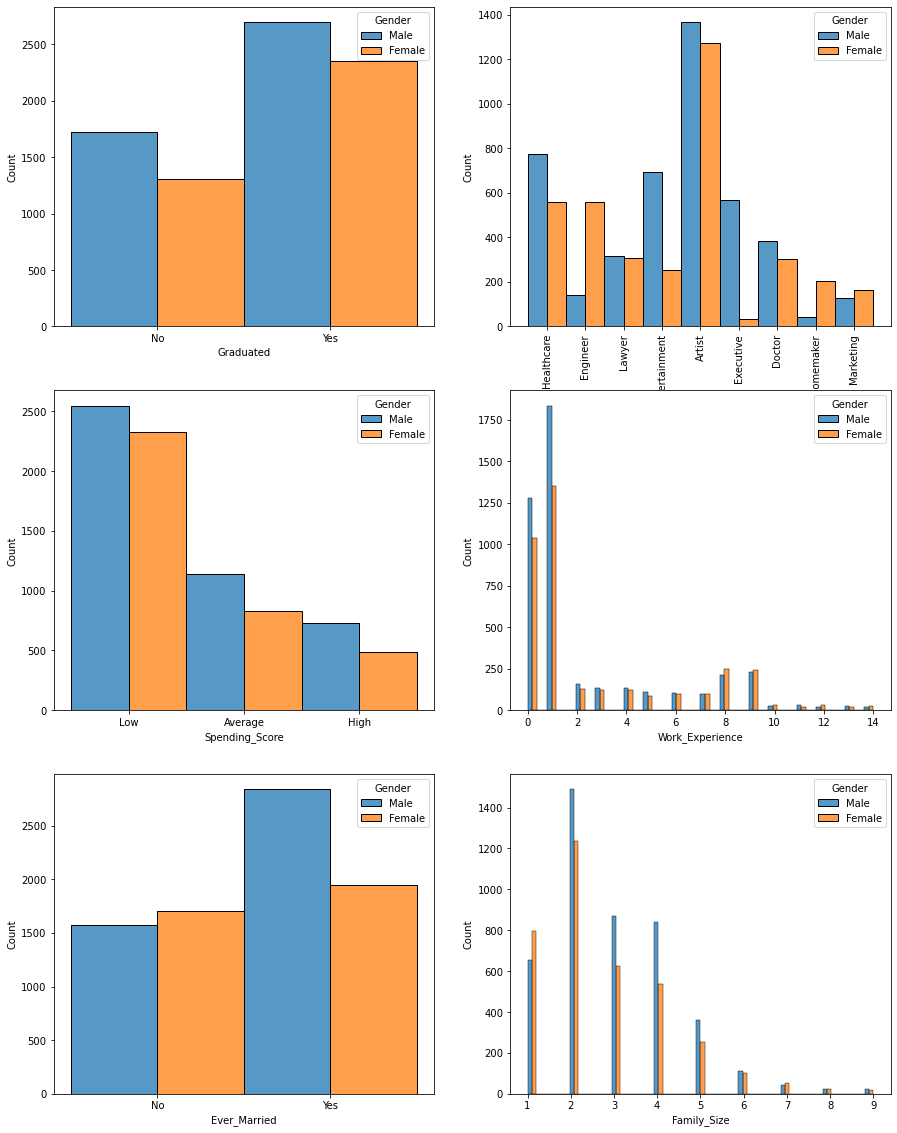

In [9]:
#Distribution of Cat Variables w.r.t Gender
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

g = sns.histplot(data, x='Profession',hue = 'Gender',multiple="dodge", ax = axs[0,1])
g.tick_params(axis='x', rotation=90)
sns.histplot(data, x='Graduated',hue = 'Gender',multiple="dodge", ax = axs[0,0])
sns.histplot(data, x='Spending_Score', hue = 'Gender',multiple="dodge", ax = axs[1,0])
sns.histplot(data, x='Work_Experience', hue = 'Gender',multiple="dodge", ax = axs[1,1])
sns.histplot(data, x='Ever_Married', hue = 'Gender',multiple="dodge", ax = axs[2,0])
sns.histplot(data, x='Family_Size', hue = 'Gender',multiple="dodge", ax = axs[2,1])

<AxesSubplot:xlabel='Family_Size', ylabel='Count'>

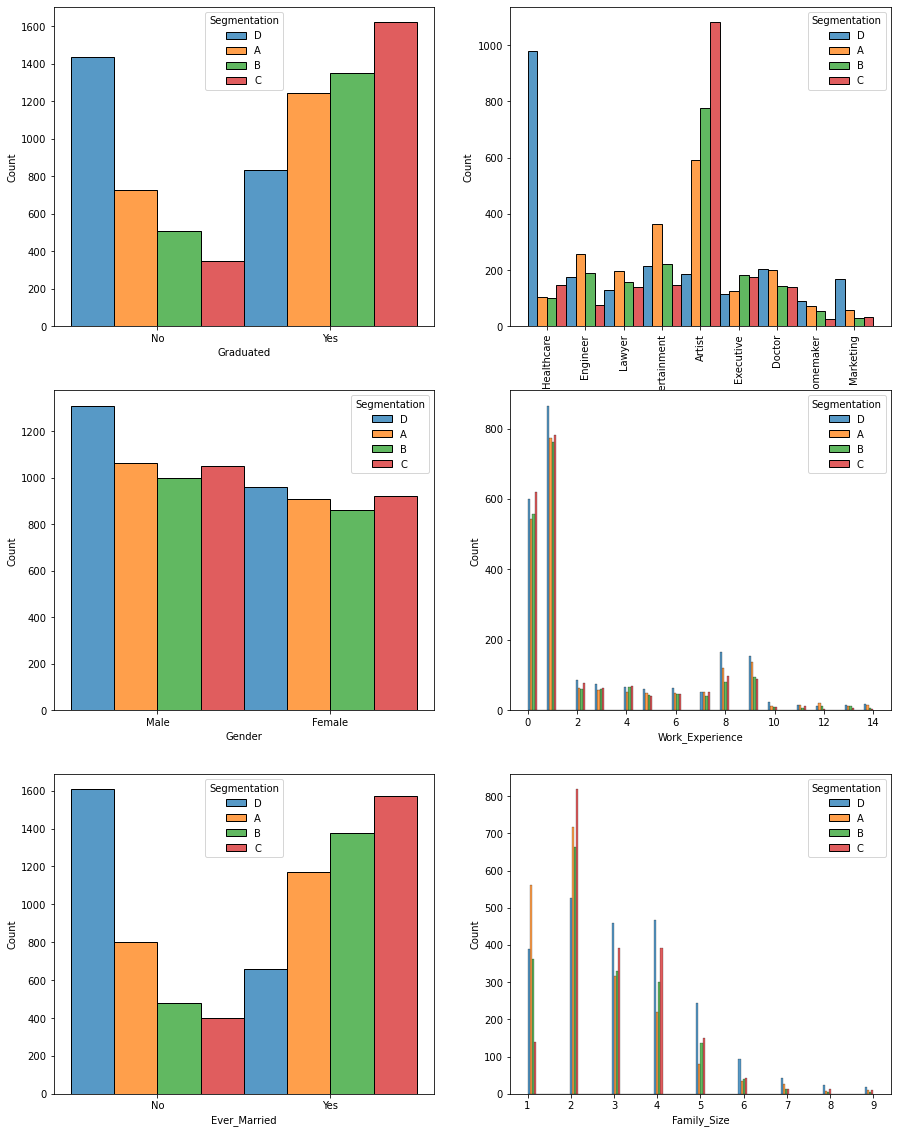

In [10]:
#Dsitribution based on Segments
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

g = sns.histplot(data, x='Profession',hue = 'Segmentation',multiple="dodge", ax = axs[0,1])
g.tick_params(axis='x', rotation=90)

sns.histplot(data, x='Graduated',hue = 'Segmentation',multiple="dodge", ax = axs[0,0])
sns.histplot(data, x='Gender', hue = 'Segmentation',multiple="dodge", ax = axs[1,0])
sns.histplot(data, x='Work_Experience', hue = 'Segmentation',multiple="dodge", ax = axs[1,1])
sns.histplot(data, x='Ever_Married', hue = 'Segmentation',multiple="dodge", ax = axs[2,0])
sns.histplot(data, x='Family_Size', hue = 'Segmentation',multiple="dodge", ax = axs[2,1])

<AxesSubplot:xlabel='Family_Size', ylabel='Count'>

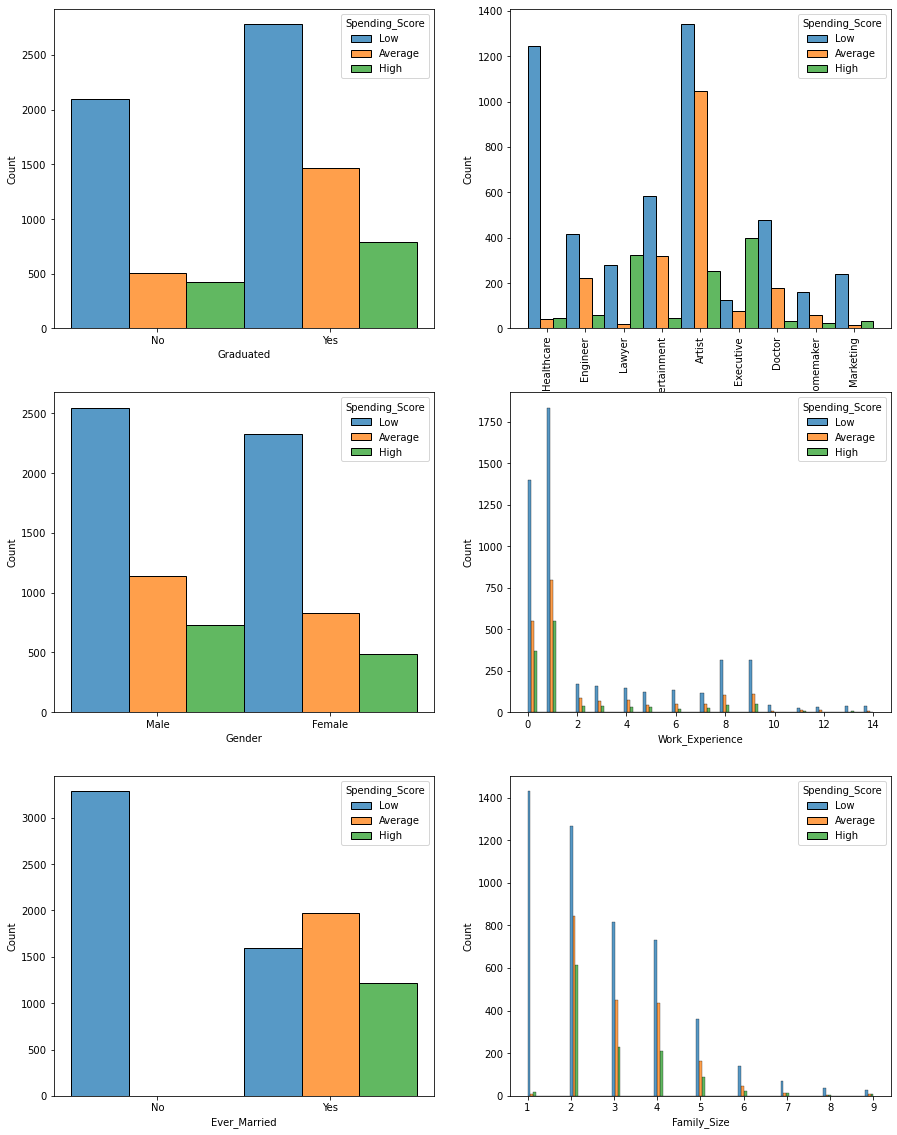

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

g = sns.histplot(data, x='Profession',hue = 'Spending_Score',multiple="dodge", ax = axs[0,1])
g.tick_params(axis='x', rotation=90)

sns.histplot(data, x='Graduated',hue = 'Spending_Score',multiple="dodge", ax = axs[0,0])
sns.histplot(data, x='Gender', hue = 'Spending_Score',multiple="dodge", ax = axs[1,0])
sns.histplot(data, x='Work_Experience', hue = 'Spending_Score',multiple="dodge", ax = axs[1,1])
sns.histplot(data, x='Ever_Married', hue = 'Spending_Score',multiple="dodge", ax = axs[2,0])
sns.histplot(data, x='Family_Size', hue = 'Spending_Score',multiple="dodge", ax = axs[2,1])

**Encoding Categorical variables**

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])
    

In [13]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
1,0,1,38,1,2,1.0,0,3.0,3,0
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
4,0,1,40,1,3,1.0,1,6.0,5,0


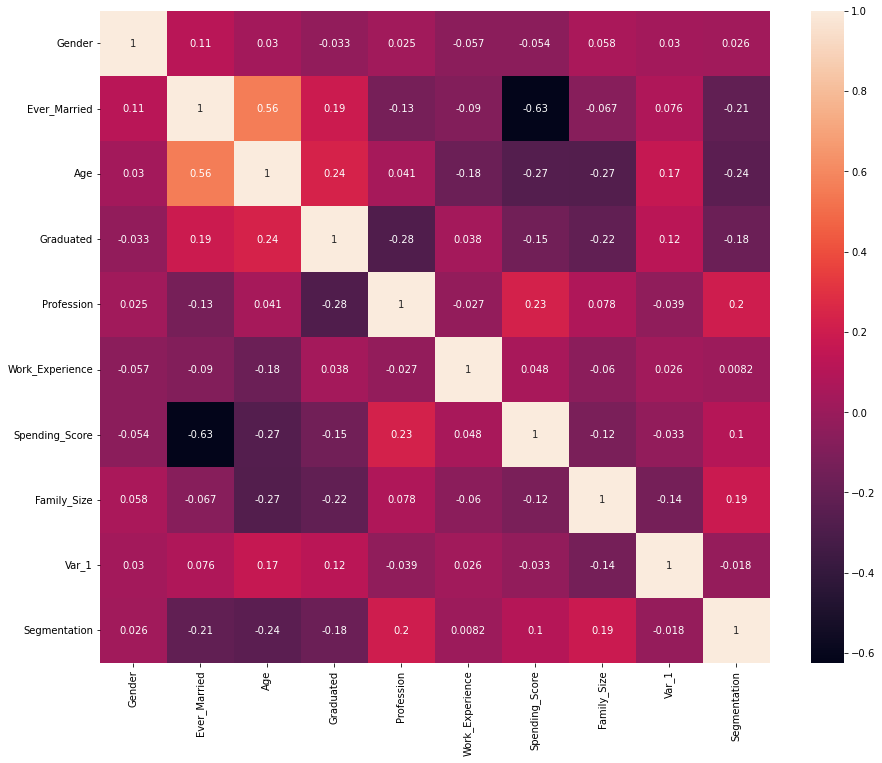

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True);

**Splitting data to X and y**

In [15]:
X = data.drop("Segmentation", axis = 1)
y = data["Segmentation"]

In [16]:
#scaling X

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)

X

array([[ 0.90916397, -1.2066533 , -1.28462344, ...,  0.754462  ,
         0.78553624, -0.80837004],
       [-1.0999116 ,  0.82873846, -0.32715082, ..., -1.60301259,
         0.1227349 , -0.80837004],
       [-1.0999116 ,  0.82873846,  1.40826831, ...,  0.754462  ,
        -1.20286777,  0.60071054],
       ...,
       [-1.0999116 , -1.2066533 , -0.62636101, ...,  0.754462  ,
        -1.20286777,  0.60071054],
       [-1.0999116 , -1.2066533 , -0.98541324, ...,  0.754462  ,
         0.78553624,  0.60071054],
       [ 0.90916397,  0.82873846, -0.38699286, ..., -1.60301259,
         0.1227349 , -0.80837004]])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

print(X_train.shape, X_test.shape)

(5647, 9) (2421, 9)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rc = RandomForestClassifier()



param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [19]:
rf_random = RandomizedSearchCV(estimator = rc, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=9, max_features=sqrt, max_leaf_nodes=6, n_estimators=50; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, max_leaf_nodes=6, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, max_leaf_nodes=9, n_estimators=100; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, n_estimators=25; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, n_estimators=25; total time=   0.1s
[CV] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, n_estimators=150; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, n_estimators=150; total time=   0.5s
[CV] END max_depth=6, max_features=None, max_leaf_nodes=3, n_estimators=100; total time=   0.4s
[CV] END max_depth=6, max_features=None, max_leaf_nodes=6, n_estimators=150; total time=   0.8s
[CV] END max_depth=3, max_features=None, max_leaf_nodes=6, n_estimators=100; 

{'n_estimators': 100,
 'max_leaf_nodes': 9,
 'max_features': None,
 'max_depth': 6}

In [20]:
rc1 = RandomForestClassifier(n_estimators = 25, random_state = 1, 
                             max_leaf_nodes = 9,max_features= None,max_depth = 9 )
rc1.fit(X_train, y_train)    

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=25, random_state=1)

In [21]:
from sklearn.metrics import classification_report
y_pred_grid = rc1.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.25      0.47      0.33       322
           1       0.34      0.38      0.36       490
           2       0.59      0.51      0.54       672
           3       0.79      0.59      0.68       937

    accuracy                           0.51      2421
   macro avg       0.49      0.48      0.48      2421
weighted avg       0.57      0.51      0.53      2421



In [22]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_pred_grid, y_test,average='micro',pos_label='positive'))
print(recall_score(y_pred_grid, y_test,average='micro',pos_label='positive'))

0.5064023130937629
0.5064023130937629


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**SVC**

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
  
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.449 total time=   1.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.451 total time=   1.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.459 total time=   1.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.458 total time=   1.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.457 total time=   2.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.488 total time=   1.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   1.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.516 total time=   1.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.511 total time=   1.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.481 total time=   1.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.481 total time=   1.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [24]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [25]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',C= 10, gamma = 0.1)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))


print(precision_score(y_pred, y_test,average='micro'))
print(recall_score(y_pred, y_test,average='micro'))

              precision    recall  f1-score   support

           0       0.43      0.45      0.44       597
           1       0.42      0.32      0.37       552
           2       0.54      0.57      0.55       580
           3       0.63      0.71      0.67       692

    accuracy                           0.52      2421
   macro avg       0.51      0.51      0.51      2421
weighted avg       0.51      0.52      0.51      2421

0.5208591491119372
0.5208591491119372


**xgboost**

In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


print(precision_score(y_pred_xgb, y_test,average='micro'))
print(recall_score(y_pred_xgb, y_test,average='micro'))

              precision    recall  f1-score   support

           0       0.43      0.42      0.43       597
           1       0.39      0.33      0.36       552
           2       0.53      0.55      0.54       580
           3       0.63      0.70      0.66       692

    accuracy                           0.51      2421
   macro avg       0.50      0.50      0.50      2421
weighted avg       0.50      0.51      0.50      2421

0.510119785212722
0.510119785212722
